# Neural network for image classification - cats and dogs

## Approach 1 - extract all the pixels

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
from keras.models import save_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tf.__version__

'2.5.0'

### Extracting pixels from images

In [2]:
directory_train = './cat_dog_1/train'
directory_test = './cat_dog_1/test'
files_train = [os.path.join(directory_train, f) for f in sorted(os.listdir(directory_train))]
files_test = [os.path.join(directory_test, f) for f in sorted(os.listdir(directory_test))]

In [3]:
height, width = 128, 128

#### Train

In [6]:
images = []
classes = []
for image_path in files_train:
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]
    except:
        continue

    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     display(Image.fromarray(image))

    image = image.ravel()

    images.append(image)

    image_name = os.path.basename(os.path.normpath(image_path))
    if image_name.startswith('c'):
        # Cat
        class_name = 0
    else:
        # Dog
        class_name = 1

    classes.append(class_name)

In [7]:
X_train = np.asarray(images)
y_train = np.asarray(classes)

In [8]:
X_train.shape

(4000, 16384)

In [9]:
y_train.shape

(4000,)

#### Test

In [10]:
images = []
classes = []
for image_path in files_test:
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]
    except:
        continue

    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.ravel()

    images.append(image)

    image_name = os.path.basename(os.path.normpath(image_path))
    if image_name.startswith('c'):
        # Cat
        class_name = 0
    else:
        # Dog
        class_name = 1

    classes.append(class_name)

In [11]:
X_test = np.asarray(images)
y_test = np.asarray(classes)

In [12]:
X_test.shape, y_test.shape

((1000, 16384), (1000,))

### Normalizing the data

In [13]:
X_train[0].max(), X_train[0].min()

(236, 1)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[0].max(), X_train[0].min()

(0.9254901960784314, 0.0)

In [16]:
X_test[0].max(), X_test[0].min()

(1.0, -0.003937007874015748)

### Building and training the neural network

In [ ]:
(16384 + 2) / 2

8193.0

In [17]:
# 16384 -> 8193 -> 8193 -> 1
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [18]:
network1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8193)              134242305 
_________________________________________________________________
dense_1 (Dense)              (None, 8193)              67133442  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8194      
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [19]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = network1.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 64s 512ms/step - loss: 0.6931 - accuracy: 0.4908
Epoch 2/10
125/125 [==============================] - 64s 515ms/step - loss: 0.6933 - accuracy: 0.5002
Epoch 3/10
125/125 [==============================] - 64s 510ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 66s 528ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 5/10
125/125 [==============================] - 65s 517ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 6/10
125/125 [==============================] - 64s 515ms/step - loss: 0.6932 - accuracy: 0.4868
Epoch 7/10
125/125 [==============================] - 64s 515ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 8/10
125/125 [==============================] - 65s 521ms/step - loss: 0.6933 - accuracy: 0.4857
Epoch 9/10
125/125 [==============================] - 63s 506ms/step - loss: 0.6932 - accuracy: 0.4810
Epoch 10/10
125/125 [==============================] - 61s 486ms/step - l

### Evaluating the neural network

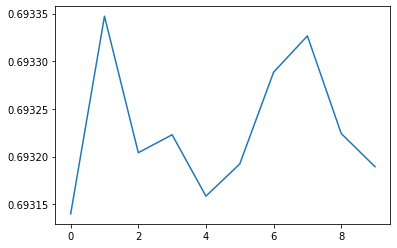

In [22]:
plt.plot(history.history['loss']);

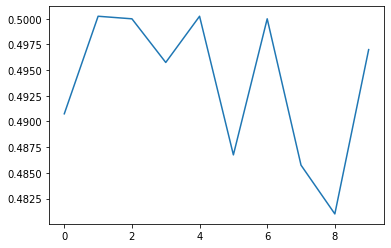

In [23]:
plt.plot(history.history['accuracy']);

In [24]:
X_test.shape

(1000, 16384)

In [25]:
predictions = network1.predict(X_test)

In [26]:
predictions = (predictions > 0.5)

In [27]:
accuracy_score(y_test, predictions)

0.501

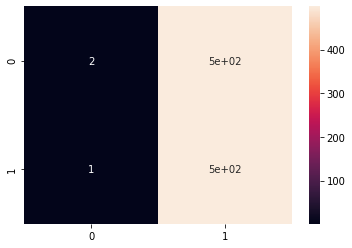

In [28]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True);

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.00      0.01       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.58      0.50      0.34      1000
weighted avg       0.58      0.50      0.34      1000

